In [1]:
from yugiquery import *
header('Cards')

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Cards - Execution started 16/01/2023 17:06 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
    *   [1.3  Save data](#Save-data)
*   [3  Check changes](#Check-changes)
    *   [3.1  Load previous data](#Load-previous-data)
    *   [3.2  Generate changelog](#Generate-changelog)
*   [4  Data visualization](#Data-visualization)
    *   [4.1  Full data](#Full-data)
    *   [4.2  Card types](#Card-types)
    *   [4.3  Monsters](#Monsters)
        *   [4.3.1  Attributes](#Attributes)
        *   [4.3.2  Primary types](#Primary-types)
            *   [4.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [4.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [4.3.2.3  By attribute](#By-attribute)
        *   [4.3.3  Secondary types](#Secondary-types)
            *   [4.3.3.1  By attribute](#By-attribute)
            *   [4.3.3.2  By secondary type](#By-secondary-type)
        *   [4.3.4  Monster types](#Monster-types)
            *   [4.3.4.1  By Attribute](#By-Attribute)
            *   [4.3.4.2  By primary type](#By-primary-type)
            *   [4.3.4.3  By secondary type](#By-secondary-type)
        *   [4.3.5  Effect type](#Effect-type)
        *   [4.3.6  ATK](#ATK)
        *   [4.3.7  DEF](#DEF)
        *   [4.3.8  Level/Rank](#Level/Rank)
            *   [4.3.8.1  ATK statistics](#ATK-statistics)
            *   [4.3.8.2  DEF statistics](#DEF-statistics)
        *   [4.3.9  Pendulum scale](#Pendulum-scale)
            *   [4.3.9.1  ATK statistics](#ATK-statistics)
            *   [4.3.9.2  DEF statistics](#DEF-statistics)
            *   [4.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [4.3.10  Link](#Link)
            *   [4.3.10.1  ATK statistics](#ATK-statistics)
        *   [4.3.11  Link Arrows](#Link-Arrows)
            *   [4.3.11.1  By combination](#By-combination)
            *   [4.3.11.2  By unique](#By-unique)
            *   [4.3.11.3  By link](#By-link)
    *   [4.4  Spell & Trap](#Spell-&-Trap)
        *   [4.4.1  Properties](#Properties)
        *   [4.4.2  Effect type](#Effect-type)
            *   [4.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [4.5  Archseries](#Archseries)
        *   [4.5.1  By card type](#By-card-type)
        *   [4.5.2  By primary type](#By-primary-type)
        *   [4.5.3  By secondary type](#By-secondary-type)
        *   [4.5.4  By monster type](#By-monster-type)
        *   [4.5.5  By property](#By-property)
    *   [4.6  Artworks](#Artworks)
        *   [4.6.1  By card type](#By-card-type)
        *   [4.6.2  By primary type](#By-primary-type)
    *   [4.7  Errata](#Errata)
        *   [4.7.1  By card type](#By-card-type)
        *   [4.7.2  By primary type](#By-primary-type)
        *   [4.7.3  By artwork](#By-artwork)
    *   [4.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [4.8.1  TGC status](#TGC-status)
            *   [4.8.1.1  By card type](#By-card-type)
            *   [4.8.1.2  By monster type](#By-monster-type)
            *   [4.8.1.3  By archseries](#By-archseries)
        *   [4.8.2  OCG status](#OCG-status)
            *   [4.8.2.1  By card type](#By-card-type)
            *   [4.8.2.2  By monster type](#By-monster-type)
            *   [4.8.2.3  By archseries](#By-archseries)
        *   [4.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [5  Extras](#Extras)
    *   [5.1 Not yet released](#Not-yet-released)
*   [6  Epilogue](#Epilogue)
    *   [6.1  HTML export](#HTML-export)
<!-- *   [6.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [71]:
# Timestamp
timestamp = pd.Timestamp.now()

# Queries
monster_query = card_query(_property = False)
st_query = card_query(_primary = False, _secondary = False, _attribute = False, _monster_type = False, _stars = False, _atk = False, _def = False, _scale = False, _link = False, _arrows = False)

# Fetch Monster
monster_df = fetch_monster(monster_query)

# Fetch Spell
spell_df = fetch_st(st_query, 'Spell')

# Fetch Trap
trap_df = fetch_st(st_query, 'Trap')

# Fetch errata
errata_df = fetch_errata()

  0%|          | 0/7 [00:00<?, ?attribute/s]

8047 results

2394 results

1823 results

532 results

719 results



## Merge data

In [72]:
# Merge errata
monster_df = merge_errata(monster_df, errata_df, drop=False)
spell_df = merge_errata(spell_df, errata_df, drop=False)
trap_df = merge_errata(trap_df, errata_df, drop=False)

# Combine data frames
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)
full_df = pd.concat([st_df, monster_df], ignore_index=True, axis=0).sort_values('Name').reset_index(drop=True)
print('Data merged')

Data merged


## Save data

In [83]:
full_df.to_csv(f'../Data/All_cards_{int(timestamp.timestamp())}.csv', index = False)
print('Data saved')

Data saved


# Check changes

## Load previous data

In [5]:
# Get list of files
files_list = sorted(glob.glob('../Data/All_cards_*.csv'), key=os.path.getctime, reverse=True)
# Get second newest file if exist
if len(files_list)>1:
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(files_list[1], dtype=object, keep_default_na=False, na_values=[''])
    # Correct tuples
    previous_df['Effect type'] = previous_df['Effect type'].dropna().apply(literal_eval)
    previous_df['Link Arrows'] = previous_df['Link Arrows'].dropna().apply(literal_eval)
    previous_df['Archseries'] = previous_df['Archseries'].dropna().apply(literal_eval)
    previous_df['Artwork'] = previous_df['Artwork'].dropna().apply(literal_eval)
    previous_df['Errata'] = previous_df['Errata'].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(full_df.dtypes.to_dict())
    print('File loaded')
else:
    previous_df = None
    print('No older files')

File loaded


## Generate changelog

In [6]:
if previous_df is None:
    print('Skipped')
else:
    changelog = generate_changelog(previous_df, full_df, col = 'Name')
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(f'../Data/Cards_changelog_{timestamp.strftime("%Y%m%d")}.csv', index = False)
        print('Changelog saved')

,Password,Effect type,Artwork,OCG status,Modification date,Errata,Version
Name,,,,,,,
Albion the Incandescent Dragon,NaN,"(Condition, Continuous Effect, Ignition Effect...",NaN,Not yet released,2022-12-29 13:01:56,NaN,Old
Albion the Incandescent Dragon,38811586,"(Condition, Continuous Effect, Ignition Effect...",NaN,Unlimited,2023-01-14 01:45:37,NaN,New
Amazement Dominator Arlekino,NaN,"(Condition, Ignition Effect, Quick Effect)",NaN,Not yet released,2022-12-25 01:16:43,NaN,Old
Amazement Dominator Arlekino,31600845,"(Condition, Ignition Effect, Quick Effect)",NaN,Unlimited,2023-01-14 01:10:39,NaN,New
Beetrooper Cruel Saturn,NaN,"(Condition, Continuous Effect, Trigger Effect)",NaN,Not yet released,2023-01-02 09:15:54,NaN,Old
...,...,...,...,...,...,...,...
Wannabee!,NaN,"(Condition, Trigger Effect)",NaN,Not yet released,2023-01-13 13:28:04,NaN,Old
World of Boundless Consciousness,44553392,"(Effect,)",NaN,Unlimited,2023-01-14 02:51:52,NaN,New
World of Boundless Consciousness,NaN,"(Effect,)",NaN,Not yet released,2022-12-29 16:43:48,NaN,Old


Changelog saved


# Data visualization

## Full data

In [80]:
full_df

,Page name,Errata
12264,Destiny HERO - Malicious,"(Name,)"
12265,Vanity's Emptiness,"(Name,)"
12266,Rare Metal Dragon,"(Name,)"
12267,Dark Scorpion - Meanae the Thorn,"(Name,)"
12268,Elemental HERO Avian,"(Name, Type)"
...,...,...
14570,Ancient Telescope,"(Type,)"
14571,Breath of Acclamation,"(Type,)"
14572,Dragonic Attack,"(Type,)"
14573,Fengsheng Mirror,"(Type,)"


Full data available to download [here](../Data)

## Card types

In [8]:
full_df.groupby('Card type').nunique()

,Name,Password,Property,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows
Card type,,,,,,,,,,,,,,,,,,,,
Monster Card,8039,7954,0,224,1001,7,7,3,7982,3,8,6,7,25,15,82,77,13,6,62
Spell Card,2392,2383,6,116,398,6,5,3,2372,3,0,0,0,0,0,0,0,0,0,0
Trap Card,1823,1811,3,95,325,6,4,2,1816,3,0,0,0,0,0,0,0,0,0,0


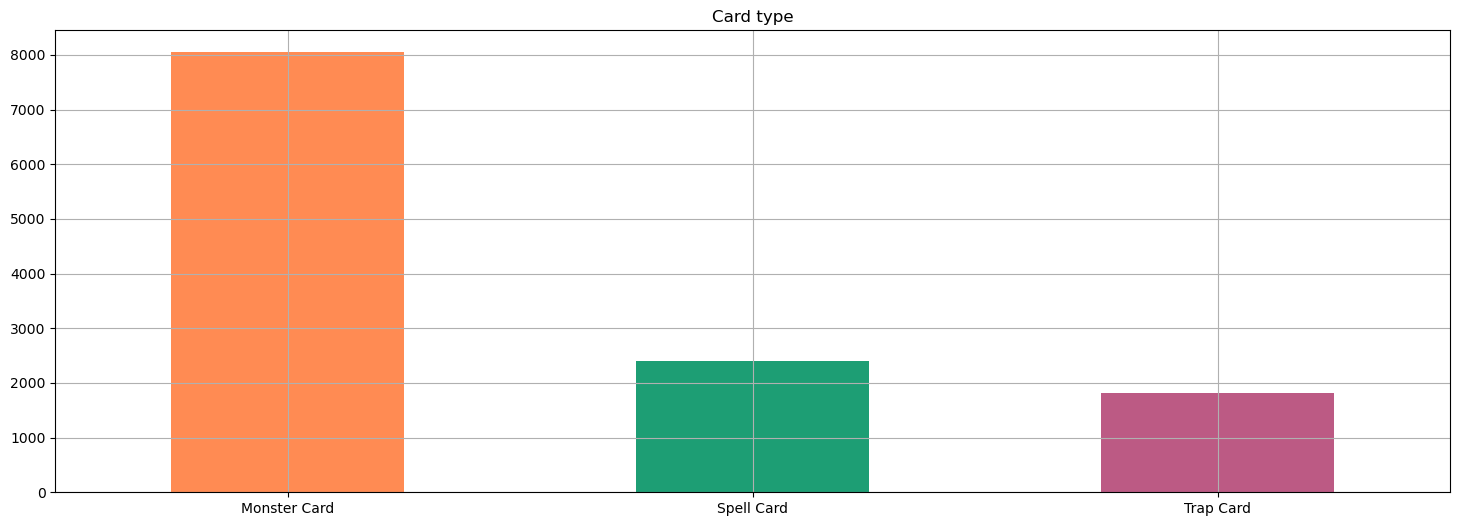

In [9]:
card_type_colors = [colors_dict[i] for i in full_df['Card type'].value_counts().index]
full_df['Card type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = card_type_colors, title = 'Card type')
plt.show()

## Monsters

### Attributes

In [10]:
print('Total number of attributes:', monster_df['Attribute'].nunique())

Total number of attributes: 7


In [11]:
monster_df.drop(columns=['Card type']).groupby('Attribute').nunique()

,Name,Password,Primary type,Secondary type,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Attribute,,,,,,,,,,,,,,,,,,
DARK,2233,2211,7,6,23,14,70,63,12,6,42,155,455,7,6,3,2229,3
DIVINE,6,0,1,0,2,2,3,3,0,0,0,6,3,2,2,1,9,3
EARTH,1885,1872,7,6,23,12,71,60,12,4,29,128,331,6,6,3,1880,3
FIRE,669,667,8,6,22,12,43,40,8,4,22,85,186,4,5,3,666,3
LIGHT,1639,1609,7,6,23,14,58,50,10,5,30,132,390,6,6,3,1632,3
WATER,839,834,7,6,22,11,56,41,9,4,16,93,206,6,6,3,839,3
WIND,768,761,7,6,23,12,46,38,11,4,14,105,215,7,7,3,765,3


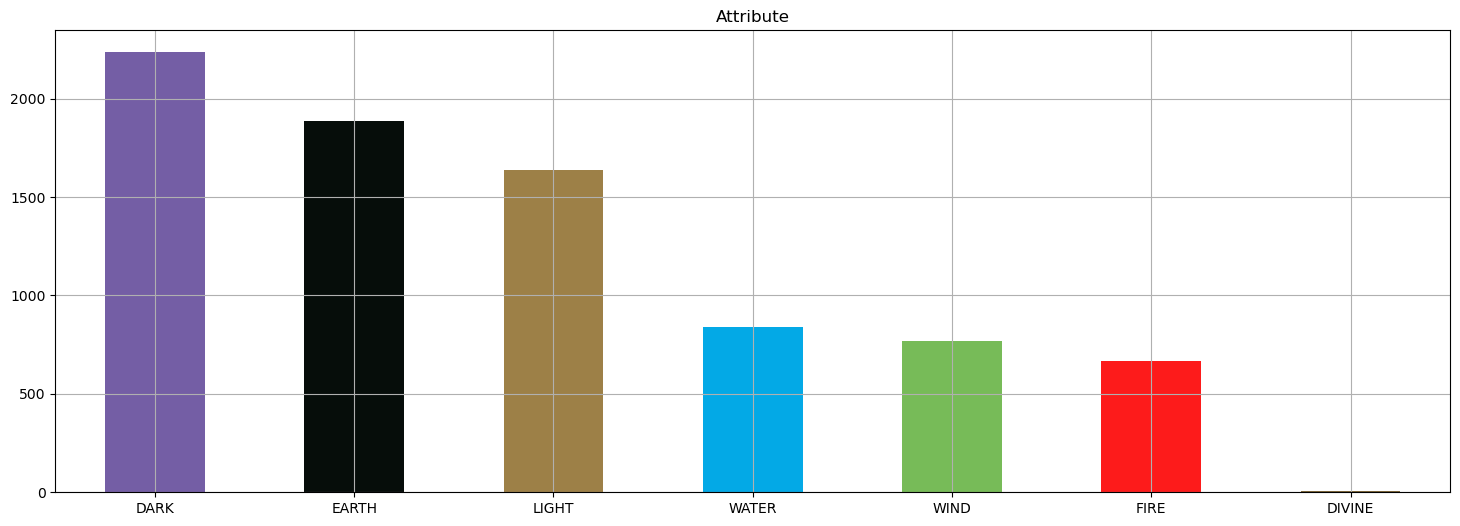

In [12]:
attribute_colors = [colors_dict[i] for i in monster_df['Attribute'].value_counts().index]
monster_df['Attribute'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=0, color = attribute_colors, title = 'Attribute')
plt.show()

### Primary types

In [13]:
print('Total number of primary types:', monster_df['Primary type'].nunique())

Total number of primary types: 8


In [14]:
monster_df.drop(columns=['Card type']).groupby('Primary type').nunique()

,Name,Password,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Primary type,,,,,,,,,,,,,,,,,,
Effect Monster,5458,5430,6,7,25,12,73,66,13,0,0,204,781,6,6,3,5424,3
Fusion Monster,433,432,1,6,23,12,48,46,4,0,0,68,140,4,4,3,431,3
Link Monster,373,367,0,6,23,0,39,0,0,6,62,52,138,5,5,3,370,2
Monster Token,1,0,0,1,1,1,1,1,0,0,0,0,1,0,1,0,1,0
Normal Monster,746,702,1,6,23,10,59,49,10,0,0,6,129,4,5,3,747,3
Ritual Monster,120,120,3,6,15,12,33,26,1,0,0,33,37,2,1,1,120,3
Synchro Monster,417,415,1,6,23,13,40,38,4,0,0,56,159,5,4,2,416,3
Xyz Monster,495,488,0,6,23,14,51,42,5,0,0,69,193,6,4,2,490,2


#### Has effect discrimination

In [15]:
has_effect = monster_df['Primary type'].where(monster_df['Effect type'].notna()).value_counts().rename('Effect')
no_effect = monster_df['Primary type'].where(monster_df['Effect type'].isna()).value_counts().rename('No Effect')
effect = pd.concat([has_effect,no_effect], axis=1).fillna(0).astype(int)
effect

,Effect,No Effect
Effect Monster,5458,0
Xyz Monster,493,2
Synchro Monster,414,3
Fusion Monster,372,61
Link Monster,368,5
Ritual Monster,105,15
Normal Monster,34,713
Monster Token,0,1


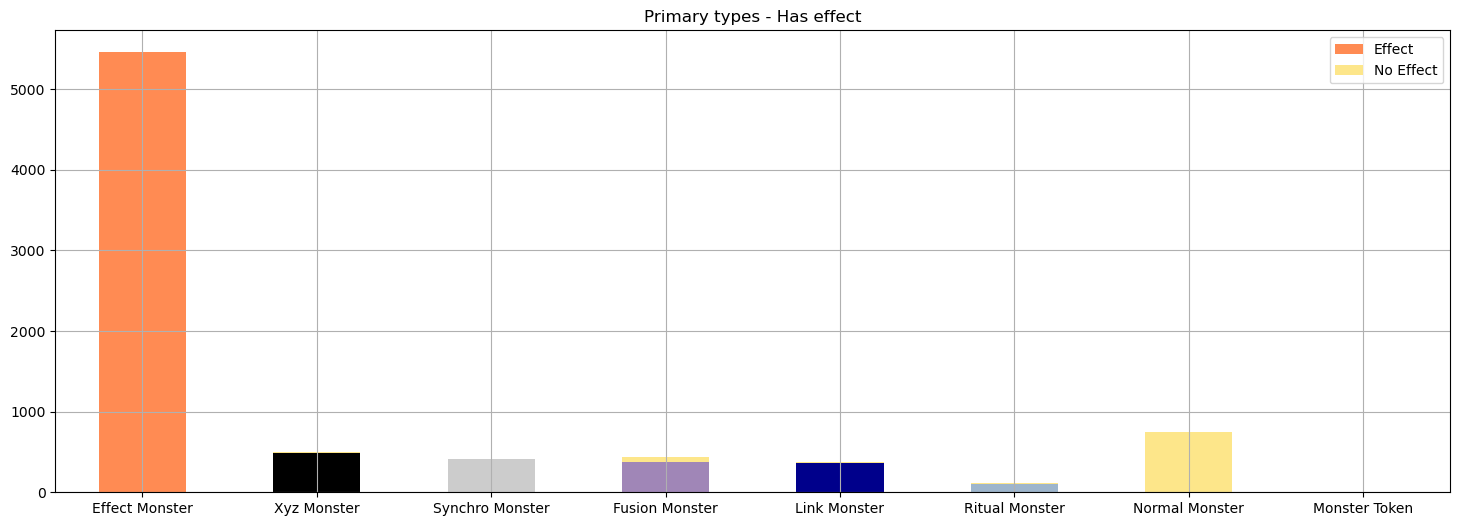

In [16]:
monster_type_colors = {'No Effect': colors_dict['Normal Monster'], 'Effect': [colors_dict[i] for i in effect.index]}
effect.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0,  legend=True, color = monster_type_colors, title = 'Primary types - Has effect')
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [17]:
not_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].isna()).value_counts().rename('Not Pendulum')
is_pendulum = monster_df['Primary type'].where(monster_df['Pendulum Scale'].notna()).value_counts().rename('Pendulum')
pendulum = pd.concat([not_pendulum,is_pendulum], axis=1).fillna(0).astype(int)
pendulum

,Not Pendulum,Pendulum
Effect Monster,5190,268
Normal Monster,709,38
Xyz Monster,486,9
Fusion Monster,423,10
Synchro Monster,410,7
Link Monster,373,0
Ritual Monster,119,1
Monster Token,1,0


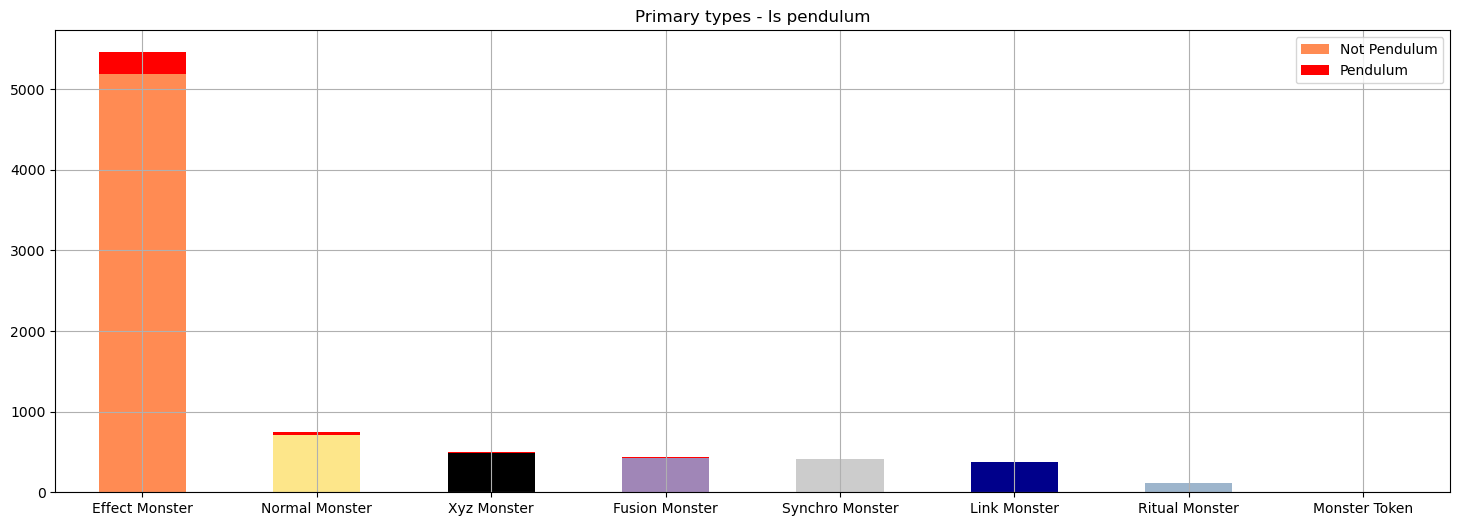

In [18]:
monster_type_colors_b = {'Pendulum': colors_dict['Pendulum Monster'], 'Not Pendulum': [colors_dict[i] for i in pendulum.index]}
pendulum.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = monster_type_colors_b, legend=True, title = 'Primary types - Is pendulum')
plt.show()

#### By attribute

In [19]:
primmary_crosstab = pd.crosstab(full_df['Primary type'],full_df['Attribute'])
primmary_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Primary type,,,,,,,
Effect Monster,1496,6,1310,454,1105,554,533
Fusion Monster,150,0,81,34,99,35,34
Link Monster,123,0,76,33,87,29,25
Monster Token,0,0,0,1,0,0,0
Normal Monster,186,0,250,52,83,109,67
Ritual Monster,36,0,17,7,34,20,6
Synchro Monster,110,0,70,50,77,36,74
Xyz Monster,135,0,83,38,154,56,29


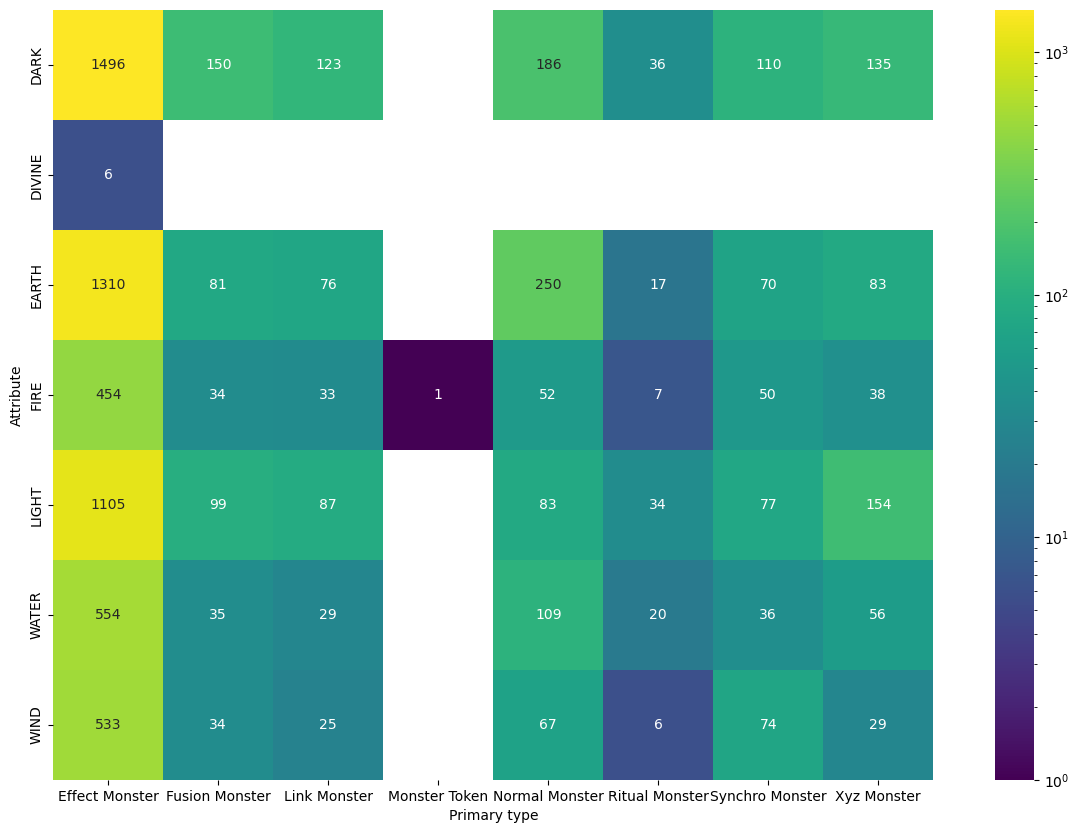

In [20]:
plt.figure(figsize = (16,10))
sns.heatmap(primmary_crosstab.T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Secondary types

In [21]:
print('Total number of secondary types:', monster_df['Secondary type'].nunique())

Total number of secondary types: 6


In [22]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Secondary type').nunique()

,Name,Password,Primary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Secondary type,,,,,,,,,,,,,,,,
Flip monster,185,184,2,6,19,12,38,33,1,20,46,3,4,1,185,3
Gemini monster,45,45,1,6,18,8,17,19,0,6,13,1,1,0,45,3
Spirit monster,39,39,2,6,13,10,22,20,2,8,4,2,2,1,39,1
Toon monster,17,17,1,6,7,5,12,15,0,8,13,1,2,1,17,2
Tuner monster,480,479,5,6,23,9,32,32,7,59,137,4,3,3,480,3
Union monster,37,37,1,6,9,8,17,14,0,6,9,1,1,1,37,2


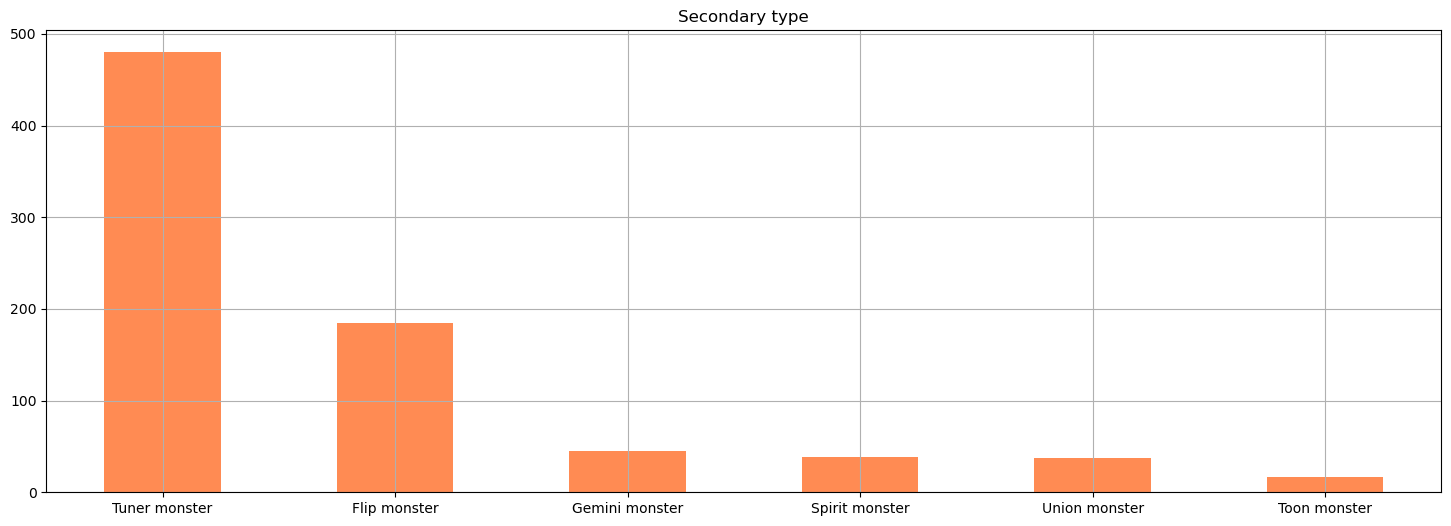

In [23]:
secondary_type_colors = colors_dict['Effect Monster']
monster_df['Secondary type'].value_counts().plot.bar(figsize = (18,6), stacked = True, grid = True, rot=0, color = secondary_type_colors, legend=False, title = 'Secondary type')
plt.show()

#### By attribute

In [24]:
secondary_crosstab = pd.crosstab(full_df['Secondary type'],full_df['Attribute'])
secondary_crosstab

Attribute,DARK,EARTH,FIRE,LIGHT,WATER,WIND
Secondary type,,,,,,
Flip monster,51,62,10,32,13,17
Gemini monster,11,8,8,6,8,4
Spirit monster,5,6,6,5,6,11
Toon monster,7,5,1,2,1,1
Tuner monster,124,93,43,97,53,70
Union monster,6,9,3,12,4,3


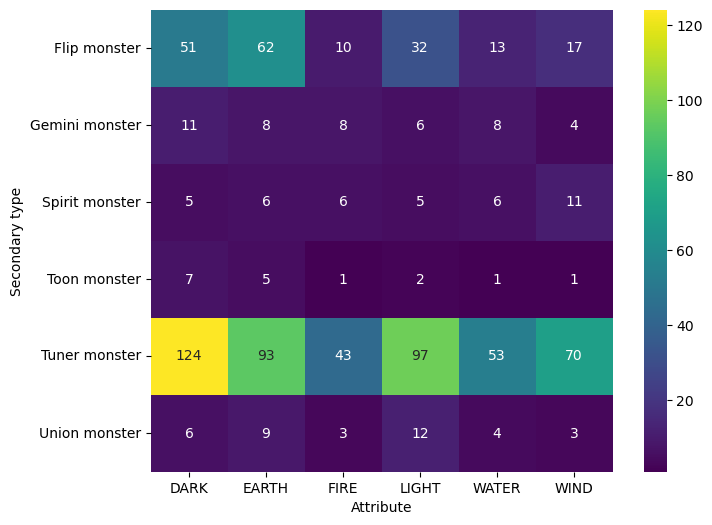

In [25]:
plt.figure(figsize = (8,6))
sns.heatmap(secondary_crosstab[secondary_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True)
plt.show()

#### By secondary type

In [26]:
secondary_crosstab_b = pd.crosstab(full_df['Primary type'],full_df['Secondary type'], margins = True)
secondary_crosstab_b

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster,All
Primary type,,,,,,,
Effect Monster,184,45,37,17,433,37,753
Fusion Monster,0,0,0,0,3,0,3
Normal Monster,0,0,0,0,12,0,12
Ritual Monster,1,0,2,0,2,0,5
Synchro Monster,0,0,0,0,30,0,30
All,185,45,39,17,480,37,803


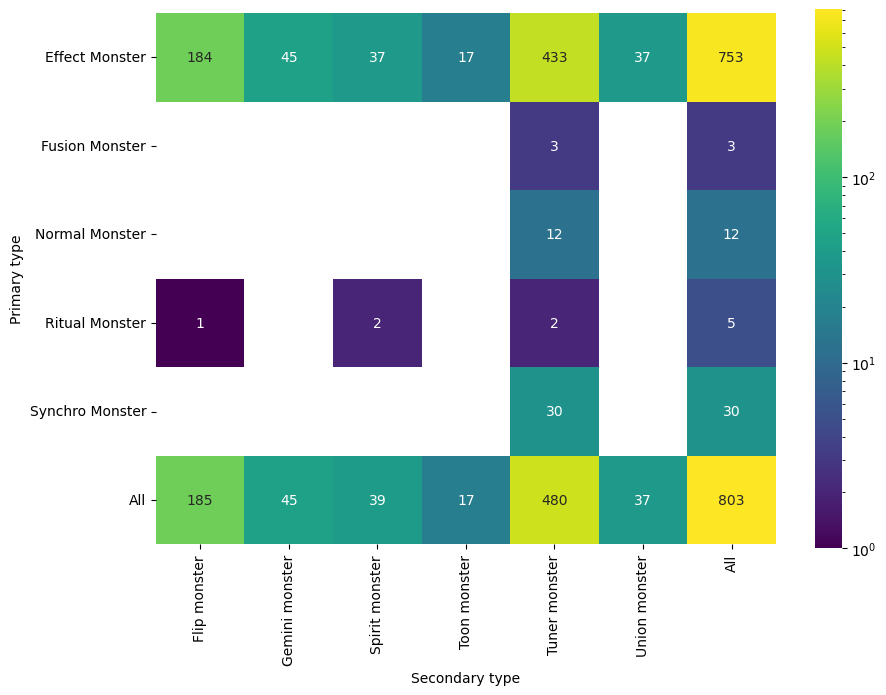

In [27]:
plt.figure(figsize = (10,7))
sns.heatmap(secondary_crosstab_b, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

### Monster types

In [28]:
print('Total number of monster types:', monster_df['Monster type'].nunique())

Total number of monster types: 25


In [29]:
monster_df.drop(columns=['Card type']).groupby('Monster type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Monster type,,,,,,,,,,,,,,,,,,
Aqua,256,254,7,6,6,10,50,33,3,2,3,51,65,4,5,1,256,3
Beast,378,371,7,4,6,10,48,38,7,2,7,60,85,4,4,2,379,3
Beast-Warrior,238,234,7,3,6,10,36,29,6,3,7,57,47,4,5,2,237,3
Creator God,1,0,1,0,1,1,1,1,0,0,0,1,1,0,1,0,1,0
Cyberse,256,254,7,1,6,11,30,29,1,6,39,45,36,5,4,3,256,2
Dinosaur,122,121,6,1,6,10,35,30,4,2,3,35,25,3,3,1,122,2
Divine-Beast,5,0,1,0,1,1,3,3,0,0,0,5,2,2,2,1,8,3
Dragon,661,657,7,6,6,13,52,48,9,5,19,108,186,6,6,3,659,3
Fairy,519,511,7,5,6,12,43,38,9,4,12,82,115,6,5,3,514,3


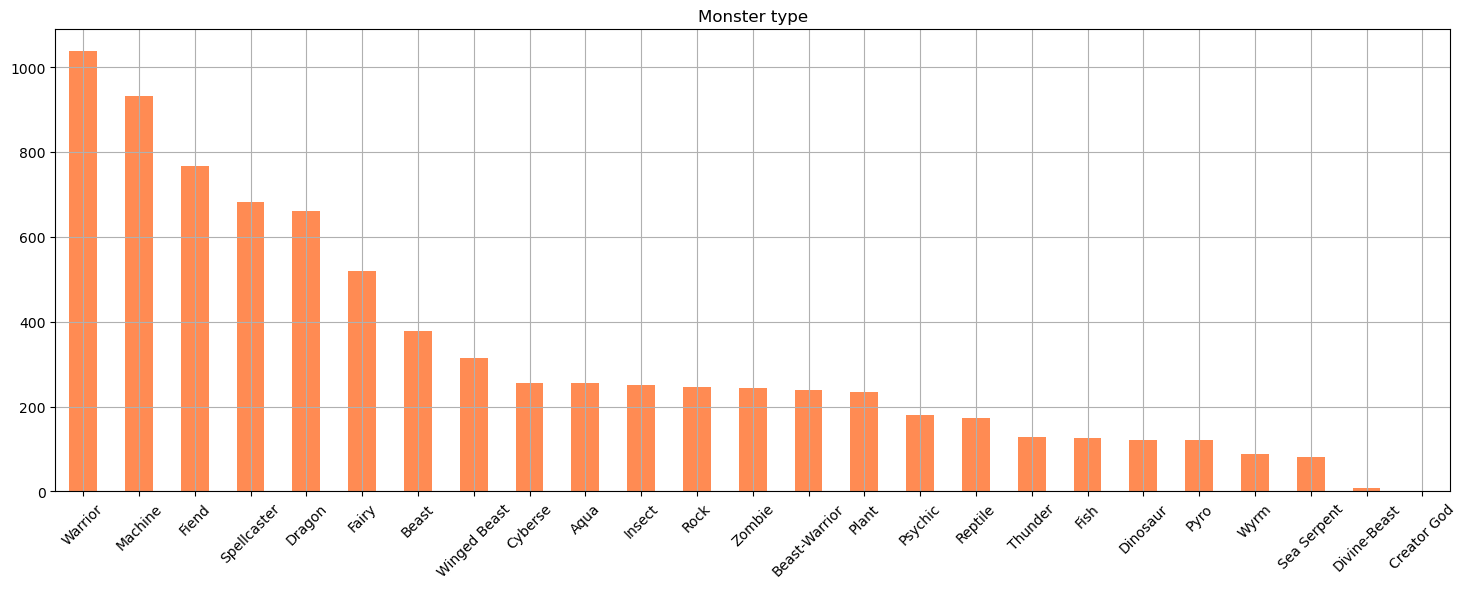

In [30]:
monster_type_colors = colors_dict['Monster Card']
monster_df['Monster type'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = monster_type_colors, title = 'Monster type')
plt.show()

#### By Attribute

In [31]:
monster_crosstab = pd.crosstab(full_df['Monster type'],full_df['Attribute'], dropna=False)
monster_crosstab

Attribute,DARK,DIVINE,EARTH,FIRE,LIGHT,WATER,WIND
Monster type,,,,,,,
Aqua,9,0,6,10,4,221,6
Beast,37,0,213,16,74,14,25
Beast-Warrior,37,0,83,54,33,16,15
Creator God,0,1,0,0,0,0,0
Cyberse,71,0,37,44,63,28,13
Dinosaur,11,0,60,32,5,8,6
Divine-Beast,0,8,0,0,0,0,0
Dragon,256,0,47,48,169,28,113
Fairy,58,0,63,17,329,27,25


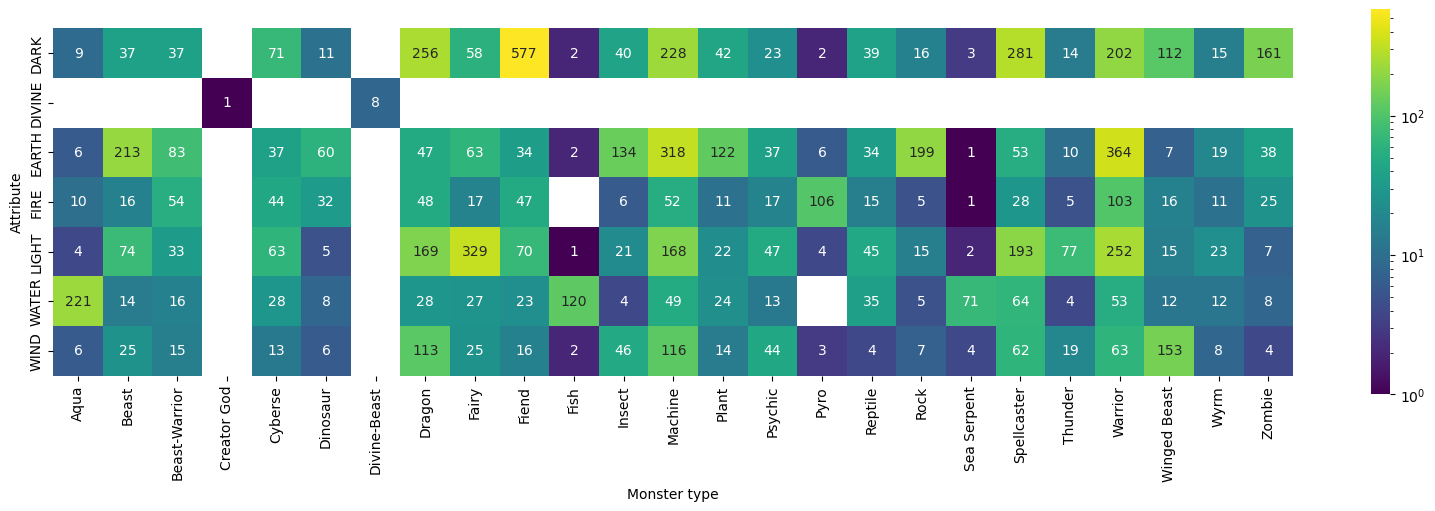

In [32]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab[monster_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

#### By primary type

In [33]:
monster_crosstab_b = pd.crosstab(full_df['Monster type'],full_df['Primary type'], dropna=False)
monster_crosstab_b

Primary type,Effect Monster,Fusion Monster,Link Monster,Monster Token,Normal Monster,Ritual Monster,Synchro Monster,Xyz Monster
Monster type,,,,,,,,
Aqua,154,11,3,0,59,8,4,17
Beast,273,17,9,0,54,1,14,11
Beast-Warrior,164,11,9,0,21,2,8,23
Creator God,1,0,0,0,0,0,0,0
Cyberse,126,5,97,0,7,7,5,9
Dinosaur,87,7,3,0,18,0,4,3
Divine-Beast,5,0,0,0,0,0,0,0
Dragon,348,64,33,0,46,15,94,61
Fairy,369,22,25,0,36,17,18,32


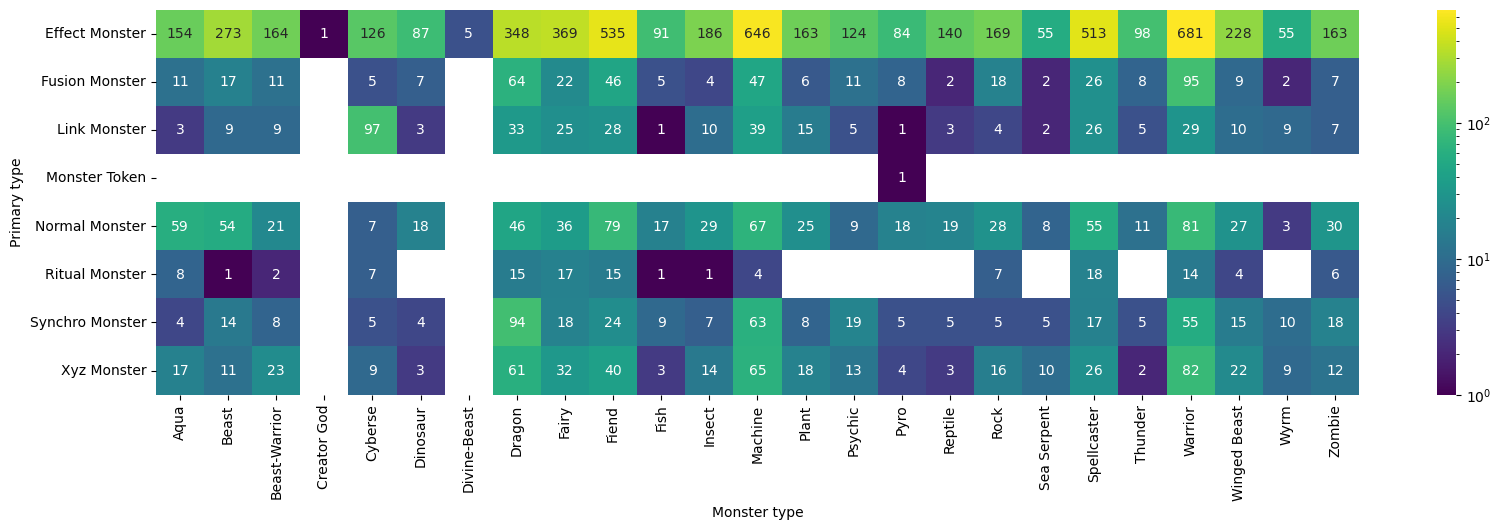

In [34]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_b[monster_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

#### By secondary type

In [35]:
monster_crosstab_c = pd.crosstab(full_df['Monster type'],full_df['Secondary type'], dropna=False)
monster_crosstab_c

Secondary type,Flip monster,Gemini monster,Spirit monster,Toon monster,Tuner monster,Union monster
Monster type,,,,,,
Aqua,4,4,1,1,11,3
Beast,15,1,2,0,22,0
Beast-Warrior,1,0,1,0,9,0
Cyberse,0,0,0,0,7,0
Dinosaur,0,0,0,0,7,0
Dragon,1,6,1,3,44,4
Fairy,8,2,8,0,22,5
Fiend,27,4,2,1,41,1
Fish,0,1,0,0,8,0


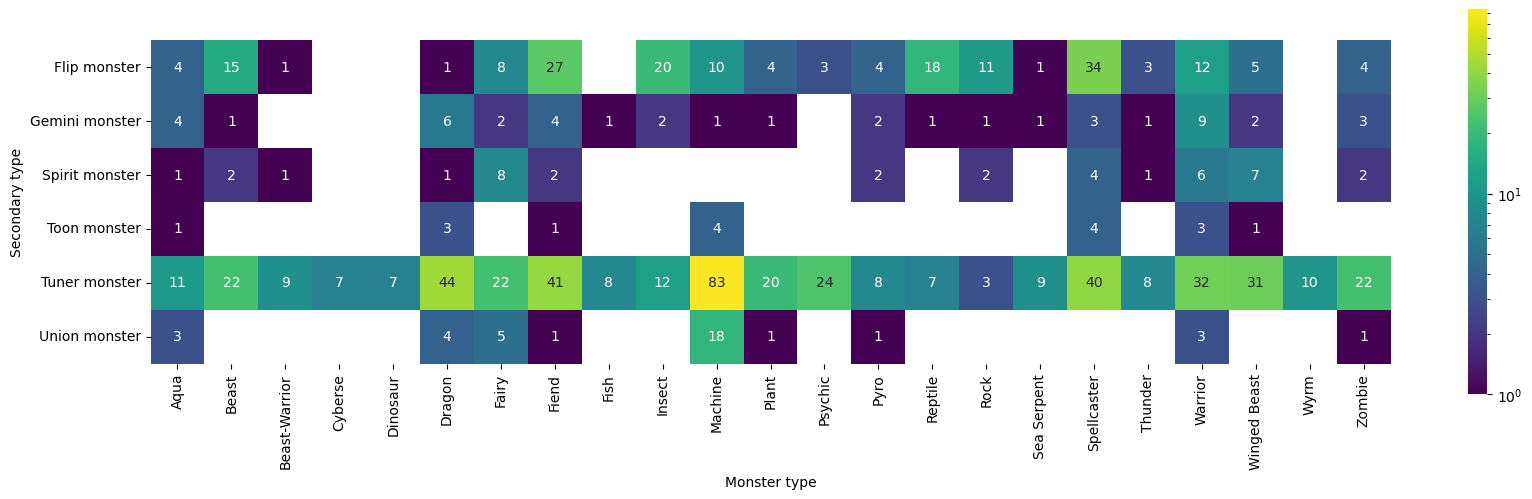

In [36]:
plt.figure(figsize = (20,5))
sns.heatmap(monster_crosstab_c[monster_crosstab_c>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm = mc.LogNorm())
plt.show()

### Effect type

In [37]:
print('Total number of effect types:', monster_df['Effect type'].explode().nunique())

Total number of effect types: 14


In [38]:
monster_df[monster_df['Effect type'].notna()].drop(columns=['Card type']).explode('Effect type').groupby('Effect type').nunique()

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Pendulum Scale,Link,Link Arrows,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Effect type,,,,,,,,,,,,,,,,,,
Activation condition,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0
Condition,3112,3076,7,6,7,25,14,63,64,13,6,54,649,5,6,3,3080,3
Continuous Effect,2167,2160,6,5,7,24,14,59,52,12,6,48,559,5,5,3,2161,3
Continuous-like Effect,235,235,6,3,6,21,11,42,36,13,1,2,72,3,2,2,235,3
Flip effect,171,170,1,1,6,19,12,38,33,1,0,0,44,3,4,1,171,3
Ignition Effect,2618,2610,6,6,7,24,13,66,61,12,5,42,641,5,6,3,2607,3
Ignition-like Effect,226,220,6,2,6,20,12,35,33,13,1,1,77,3,4,1,226,3
Lingering effect,19,19,2,2,6,14,8,13,14,0,2,2,12,2,2,0,18,0
Maintenance cost,44,44,3,0,6,12,8,21,18,2,1,1,8,1,1,0,44,1


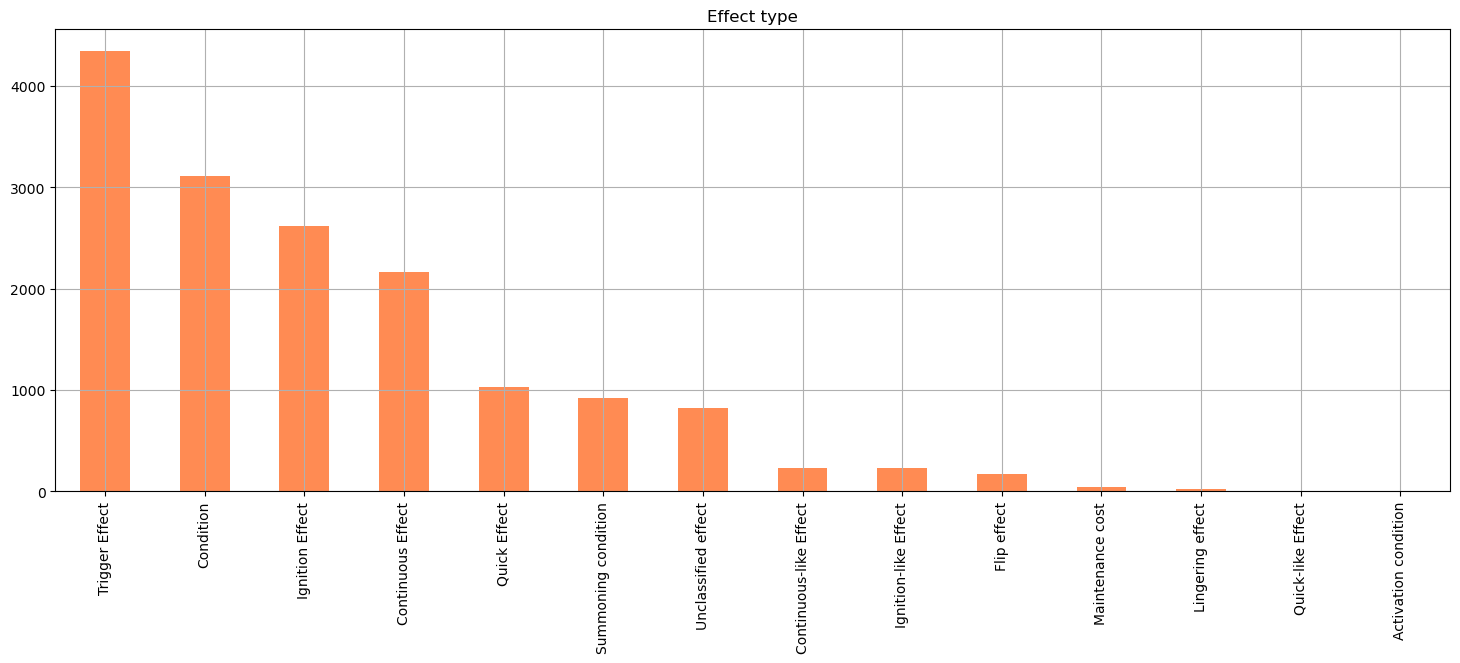

In [39]:
monster_effect_colors = colors_dict['Effect Monster']
monster_df['Effect type'].explode('Effect type').value_counts().plot.bar(figsize = (18,6), grid = True, color = monster_effect_colors, title='Effect type')
# plt.yscale('log')
plt.show()

### ATK

In [40]:
print('Total number of ATK values:', monster_df['ATK'].nunique())

Total number of ATK values: 82


In [41]:
monster_df.drop(columns=['Card type']).groupby('ATK').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,DEF,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
ATK,,,,,,,,,,,,,,,,,,
0,626,600,8,5,6,23,13,35,9,5,15,94,236,7,6,3,624,3
50,2,2,1,0,2,2,1,2,0,0,0,2,2,1,1,0,2,0
100,219,219,5,3,6,20,11,27,8,2,2,48,107,4,2,2,219,3
150,1,1,1,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0
200,122,122,6,5,6,20,7,22,5,1,2,36,69,3,3,1,122,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,12,12,3,0,3,6,4,4,0,0,0,10,9,1,1,1,12,2
4600,2,2,1,0,2,1,1,1,0,0,0,2,1,1,1,1,2,0
5000,9,9,5,0,3,4,2,4,0,1,1,8,6,1,1,1,9,1


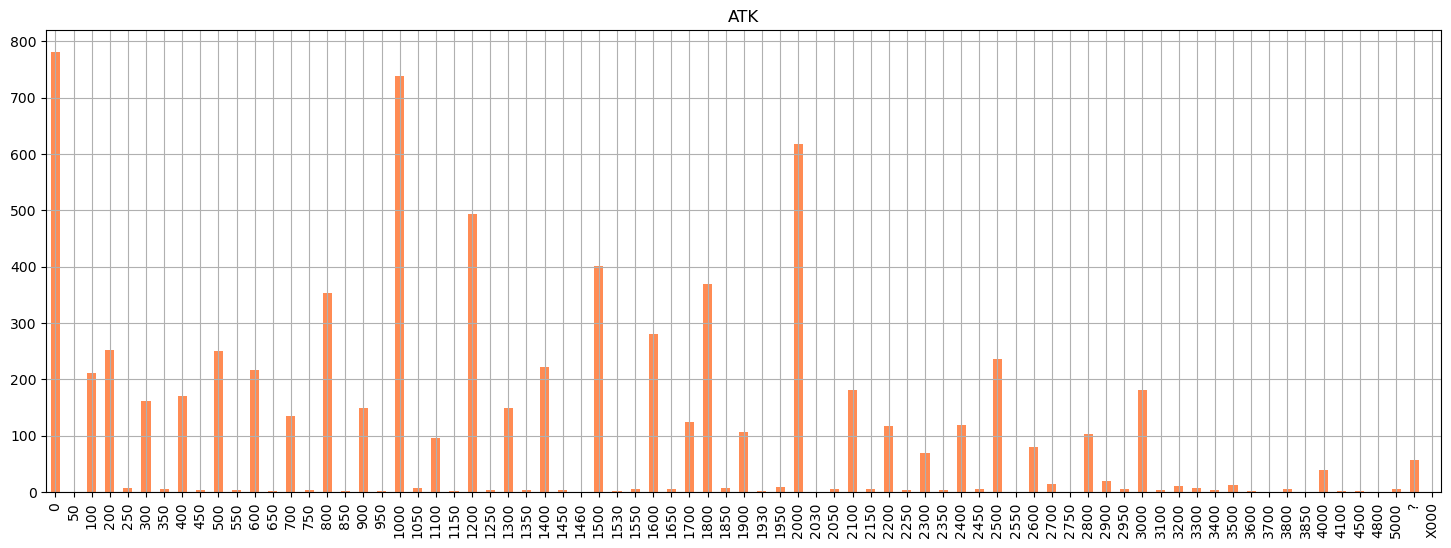

In [42]:
atk_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = atk_colors, title = 'ATK')
plt.show()

### DEF

In [43]:
print('Total number of DEF values:', monster_df['DEF'].nunique())

Total number of DEF values: 77


In [44]:
monster_df.drop(columns=['Card type']).groupby('DEF').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,Pendulum Scale,Link,Link Arrows,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
DEF,,,,,,,,,,,,,,,,,,
0,781,754,7,6,6,23,14,45,10,0,0,104,260,6,5,2,777,3
50,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1,0
100,211,211,5,4,6,19,10,24,8,0,0,47,95,4,3,2,208,3
200,252,251,5,5,6,23,10,31,5,0,0,48,109,3,4,2,252,3
250,8,8,2,1,4,5,2,4,0,0,0,5,3,1,1,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,2,2,2,0,2,2,1,1,0,0,0,2,1,1,1,0,2,0
4800,1,1,1,0,1,1,1,1,0,0,0,1,1,1,1,0,1,0
5000,5,5,2,0,3,3,2,2,0,0,0,4,3,1,1,1,5,1


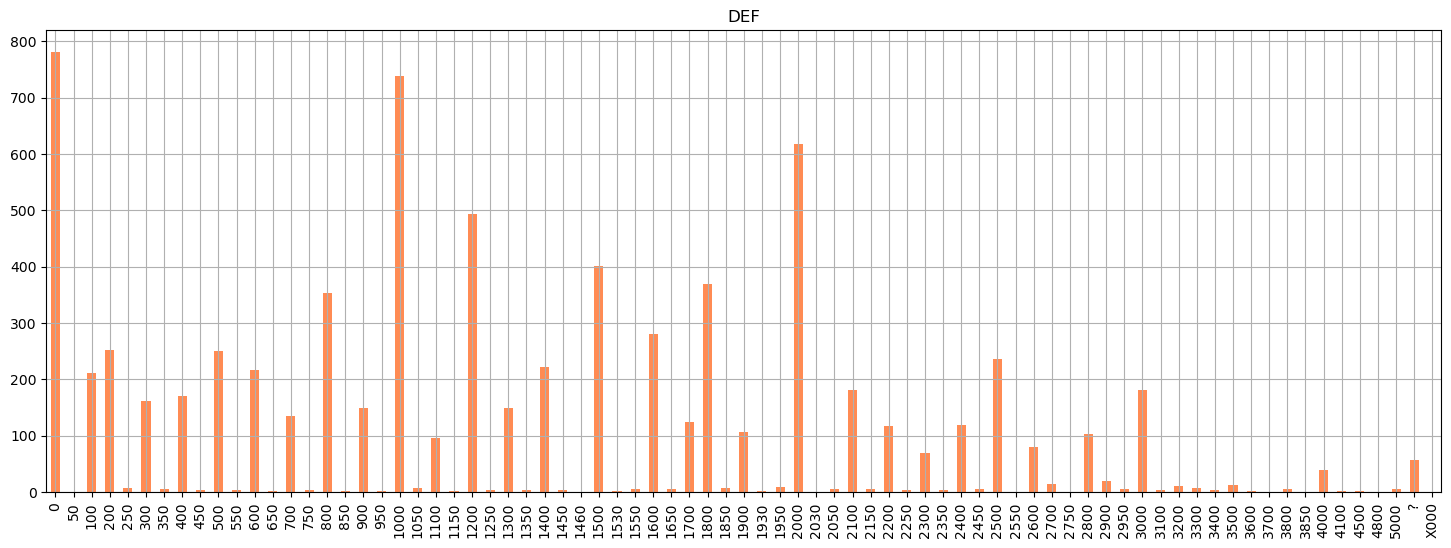

In [45]:
def_colors = colors_dict['Monster Card']
monster_df['DEF'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, color = def_colors, title = 'DEF')
plt.show()

### Level/Rank

In [46]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Level/Rank').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,ATK,DEF,Pendulum Scale,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Level/Rank,,,,,,,,,,,,,,,,
0,6,6,2,0,2,2,3,3,0,5,3,2,2,0,6,0
1,635,610,7,5,6,23,22,29,10,81,228,6,4,2,633,3
2,680,674,6,5,6,23,29,30,7,75,214,5,6,2,679,3
3,1151,1144,6,5,6,23,41,36,9,94,293,5,7,3,1151,3
4,2352,2347,6,6,6,23,54,47,9,134,513,5,7,3,2345,3
5,599,599,6,6,6,23,46,38,8,84,241,3,3,2,599,3
6,610,607,6,6,6,23,38,38,9,92,234,6,5,3,611,3
7,470,465,6,6,6,23,38,35,9,101,226,5,5,2,470,3
8,678,665,6,5,6,23,42,41,8,111,299,5,5,3,678,3


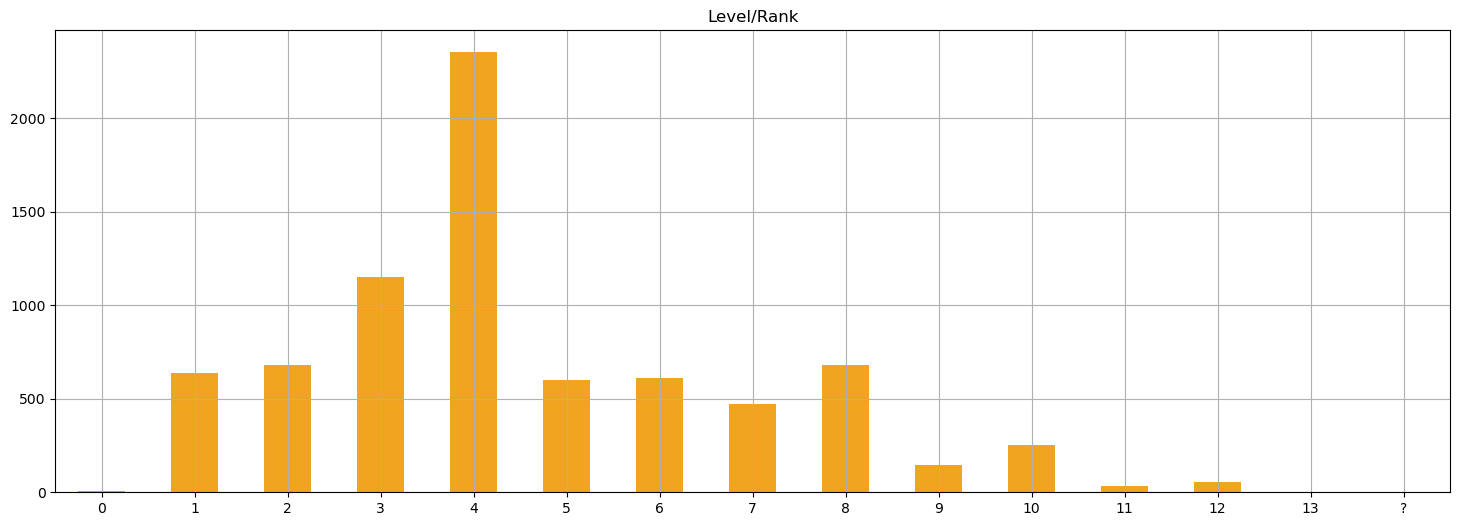

In [47]:
stars_colors = colors_dict['Level']
monster_df['Level/Rank'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color= stars_colors, title = 'Level/Rank')
plt.show()

#### ATK statistics

In [48]:
monster_df[['Level/Rank','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            625.0   238.640000   350.490371  0.0     0.0   100.0   300.0   
2            678.0   578.982301   409.340713  0.0   300.0   500.0   800.0   
3           1148.0   955.095819   487.813735  0.0   600.0  1000.0  1300.0   
4           2340.0  1417.790598   541.912389  0.0  1200.0  1500.0  1800.0   
5            596.0  1763.708054   641.811912  0.0  1500.0  1900.0  2200.0   
6            607.0  2014.744646   611.962077  0.0  1900.0  2200.0  2400.0   
7            466.0  2285.300429   619.619738  0.0  2200.0  2500.0  2600.0   
8            670.0  2546.940299   706.404851  0.0  2500.0  2800.0  3000.0   
9            142.0  2603.169014   836.367839  0.0  2500.0  2800.0  3000.0   
10           232.0  2817.456897  1216.555708  0.0  2800.0  3000.0  3500.0   
11            31.0  2990.322581  1074.741779  0.0  3000.0  3300.0  3500.0   
12            50.0  3312.000000  1376.573682  0.0  3000.0  4000.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          4000.0  
12          5000.0

#### DEF statistics

In [49]:
monster_df[['Level/Rank','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Level/Rank').describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            627.0   338.835726   519.149049  0.0     0.0   100.0   400.0   
2            679.0   663.475700   557.721605  0.0   200.0   500.0   900.0   
3           1148.0   952.700348   573.891888  0.0   600.0   900.0  1300.0   
4           2342.0  1168.736123   608.992578  0.0   800.0  1200.0  1600.0   
5            597.0  1426.800670   674.875068  0.0  1000.0  1500.0  1900.0   
6            607.0  1553.261944   710.806428  0.0  1200.0  1600.0  2000.0   
7            468.0  1889.957265   653.057050  0.0  1600.0  2000.0  2312.5   
8            677.0  1983.013294   847.485537  0.0  1600.0  2100.0  2500.0   
9            142.0  2308.802817   792.838050  0.0  2000.0  2500.0  2900.0   
10           241.0  2232.572614  1274.618905  0.0  1900.0  2500.0  3000.0   
11            31.0  2672.580645  1151.364315  0.0  2250.0  3000.0  3400.0   
12            51.0  2896.078431  1603.241814  0.0  2000.0  3200.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          4000.0  
12          5000.0

### Pendulum scale

In [50]:
monster_df.drop(columns=['Card type', 'Link', 'Link Arrows']).groupby('Pendulum Scale').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Primary type,Secondary type,Attribute,Monster type,Level/Rank,ATK,DEF,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Pendulum Scale,,,,,,,,,,,,,,,,
0,11,11,2,1,5,8,6,6,6,9,8,1,1,1,11,0
1,70,67,5,2,6,10,11,28,27,38,39,3,4,1,70,1
2,36,36,2,1,6,11,6,17,22,21,15,3,2,1,36,2
3,37,37,3,1,6,16,8,23,15,24,17,1,1,0,37,0
4,33,33,5,0,5,8,8,18,16,25,17,1,1,2,33,1
5,34,34,2,1,6,12,7,23,21,20,16,3,3,0,34,1
6,15,15,1,1,4,7,6,11,11,11,9,1,1,0,15,0
7,27,27,2,1,6,14,6,19,17,14,16,1,1,1,27,2
8,43,43,5,1,6,9,8,19,18,24,23,1,2,0,43,0


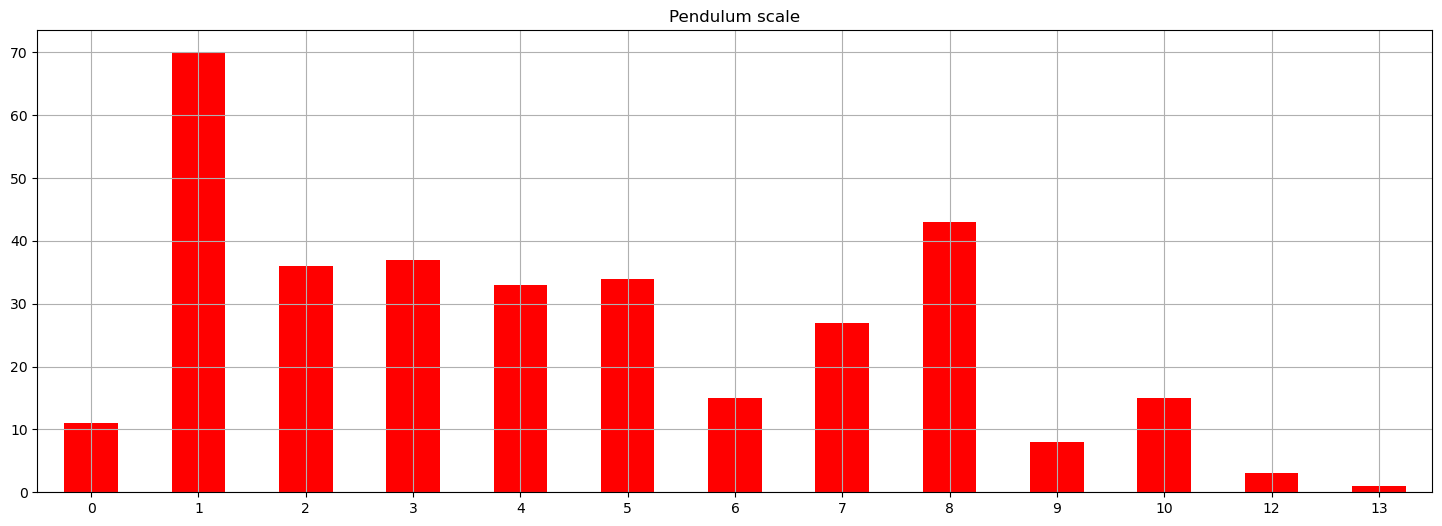

In [51]:
scales_colors = colors_dict['Pendulum Monster']
monster_df['Pendulum Scale'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = scales_colors, title = 'Pendulum scale')
plt.show()

#### ATK statistics

In [52]:
monster_df[['Pendulum Scale','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1281.818182  1300.629218     0.0     0.0  1100.0   
1               69.0  1740.579710  1034.737654     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               37.0  1463.513514   848.417534     0.0   600.0  1750.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               43.0  1211.627907   946.222893     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2100.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               1900.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### DEF statistics

In [53]:
monster_df[['Pendulum Scale','DEF']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               11.0  1154.545455  1217.672892     0.0     0.0   700.0   
1               70.0  1632.857143   968.447350     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               37.0  1144.594595   787.910720     0.0   500.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               43.0  1048.837209   761.693631     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               1.0     0.000000          NaN     0.0     0.0     0.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1600.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
12              2275.0  3000.0  
13                 0.0     0.0

#### Level/Rank statistics

In [54]:
monster_df[['Pendulum Scale','Level/Rank']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Pendulum Scale').describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    11.0  5.636364  3.529100  1.0  2.00   7.0   8.00  10.0
1                    70.0  6.042857  2.410338  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    37.0  4.432432  1.708484  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    43.0  3.860465  2.284330  1.0  2.00   4.0   5.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    1.0  7.000000       NaN  7.0  7.00   7.0   7.00   7.0

### Link

In [55]:
monster_df.drop(columns=['Card type', 'Primary type', 'Secondary type','Level/Rank','DEF','Pendulum Scale']).groupby('Link').nunique().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce'))

,Name,Password,Attribute,Monster type,ATK,Link Arrows,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Link,,,,,,,,,,,,,
1,48,48,6,11,10,8,17,27,3,4,1,48,0
2,186,186,6,23,24,19,32,102,2,4,3,184,2
3,84,84,6,16,18,17,25,48,2,2,2,84,1
4,44,41,6,16,12,13,21,24,3,4,3,44,0
5,9,6,2,5,4,3,6,5,3,2,0,9,0
6,2,2,1,1,2,2,2,2,1,1,0,2,0


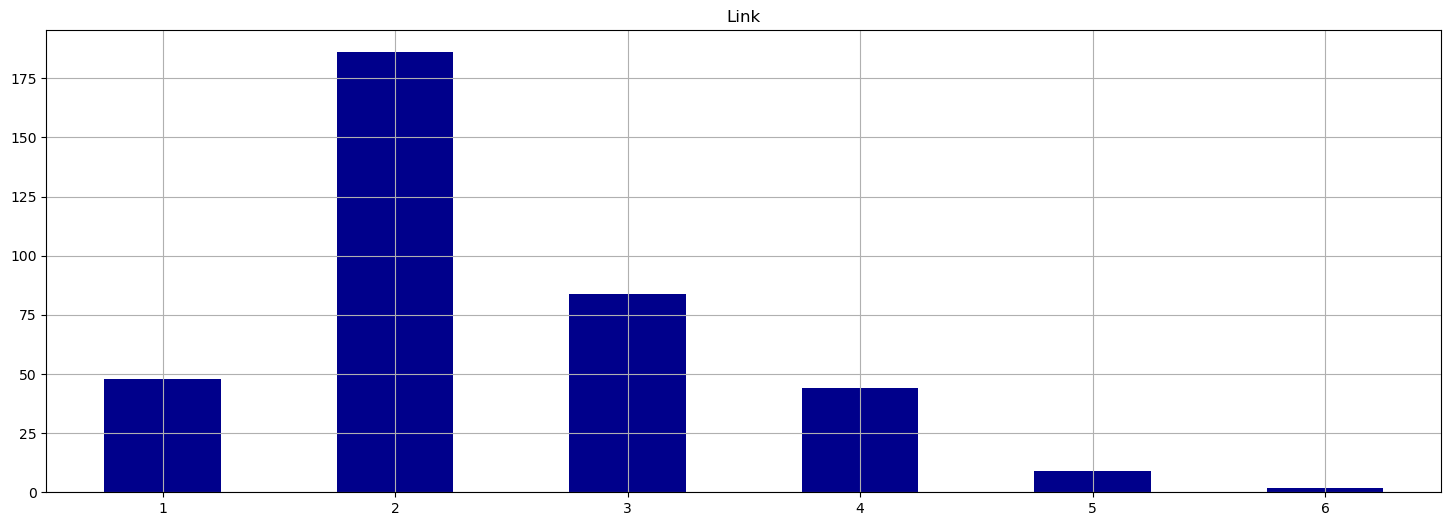

In [56]:
link_colors = colors_dict['Link Monster']
monster_df['Link'].value_counts().sort_index(key=lambda x: pd.to_numeric(x, errors = 'coerce')).plot.bar(figsize = (18,6), grid = True, rot=0, color = link_colors, title='Link')
plt.show()

#### ATK statistics

In [57]:
monster_df[['Link','ATK']].apply(pd.to_numeric, errors = 'coerce').dropna().astype(int).groupby('Link').describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      48.0   737.500000   477.860925     0.0   450.0   800.0  1000.0  1500.0
2     186.0  1405.645161   508.849113     0.0  1100.0  1500.0  1800.0  2300.0
3      84.0  2258.928571   651.234264     0.0  2200.0  2400.0  2500.0  4000.0
4      43.0  2660.465116   653.976676     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [58]:
print('Total number of link arrow combinations:', monster_df['Link Arrows'].nunique())

Total number of link arrow combinations: 62


In [59]:
monster_df.drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Link', 'Secondary type', 'DEF']).groupby('Link Arrows').nunique()

,Name,Password,Attribute,Monster type,ATK,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Link Arrows,,,,,,,,,,,,
"(←,)",5,5,2,3,2,4,4,3,2,0,5,0
"(←, ↑)",4,4,2,3,4,3,2,1,1,0,4,0
"(←, →)",18,18,6,8,11,8,9,2,2,1,18,0
"(←, →, ↑)",8,8,4,5,6,7,5,1,1,0,8,0
"(↑,)",10,10,5,5,6,9,5,1,1,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
"(↙, ↘, ←, ↖)",1,1,1,1,1,1,1,1,1,0,1,0
"(↙, ↘, ↑)",22,22,6,11,11,11,15,2,2,2,22,1
"(↙, ↘, →)",2,2,2,2,2,2,2,1,1,0,2,0


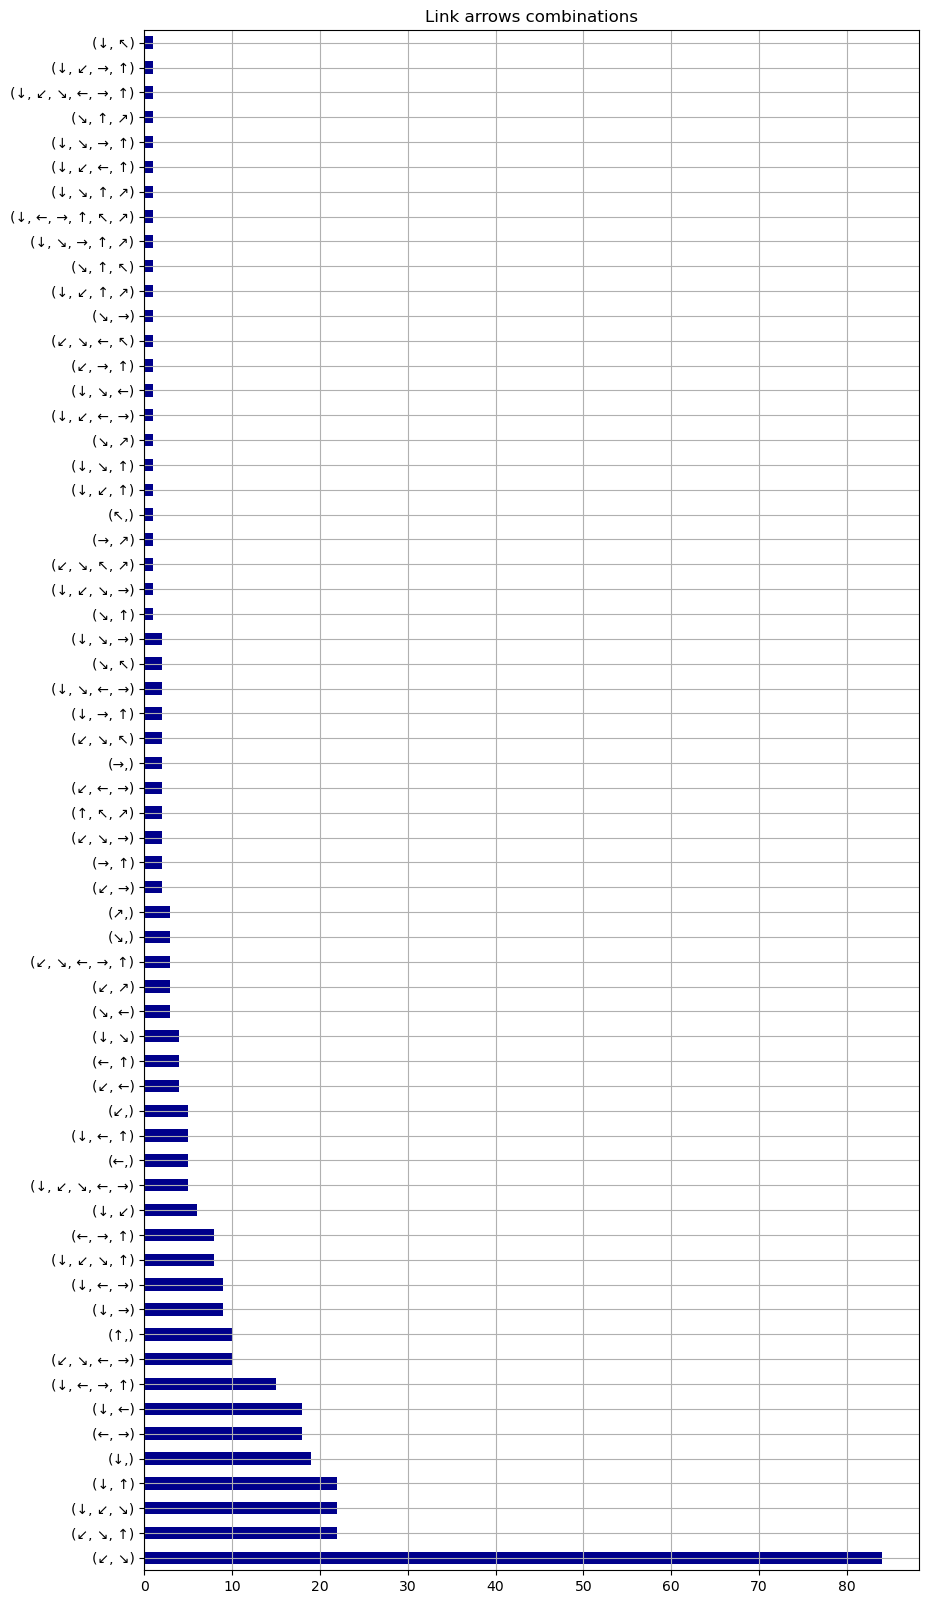

In [60]:
arrows_colors = colors_dict['Link Monster']
monster_df['Link Arrows'].value_counts().plot.barh(figsize = (10,20), grid = True, color = arrows_colors, title = 'Link arrows combinations')
plt.show()

#### By unique

In [61]:
monster_df[monster_df['Link Arrows'].notna()].drop(columns=['Card type', 'Primary type', 'Level/Rank', 'Pendulum Scale', 'Secondary type', 'DEF']).explode('Link Arrows').groupby('Link Arrows').nunique()

,Name,Password,Attribute,Monster type,ATK,Link,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Link Arrows,,,,,,,,,,,,,
←,117,111,6,21,29,6,35,46,5,3,3,117,0
↑,117,114,6,19,27,6,31,44,4,4,3,117,1
→,103,97,6,19,27,6,30,40,4,3,2,103,0
↓,162,156,6,20,32,6,41,70,3,4,3,161,0
↖,12,12,5,5,10,5,7,6,1,2,2,12,0
↗,16,16,5,7,11,6,7,8,1,2,2,16,0
↘,188,185,6,22,33,6,36,103,4,4,3,187,2
↙,190,187,6,22,34,6,37,104,4,5,3,189,2


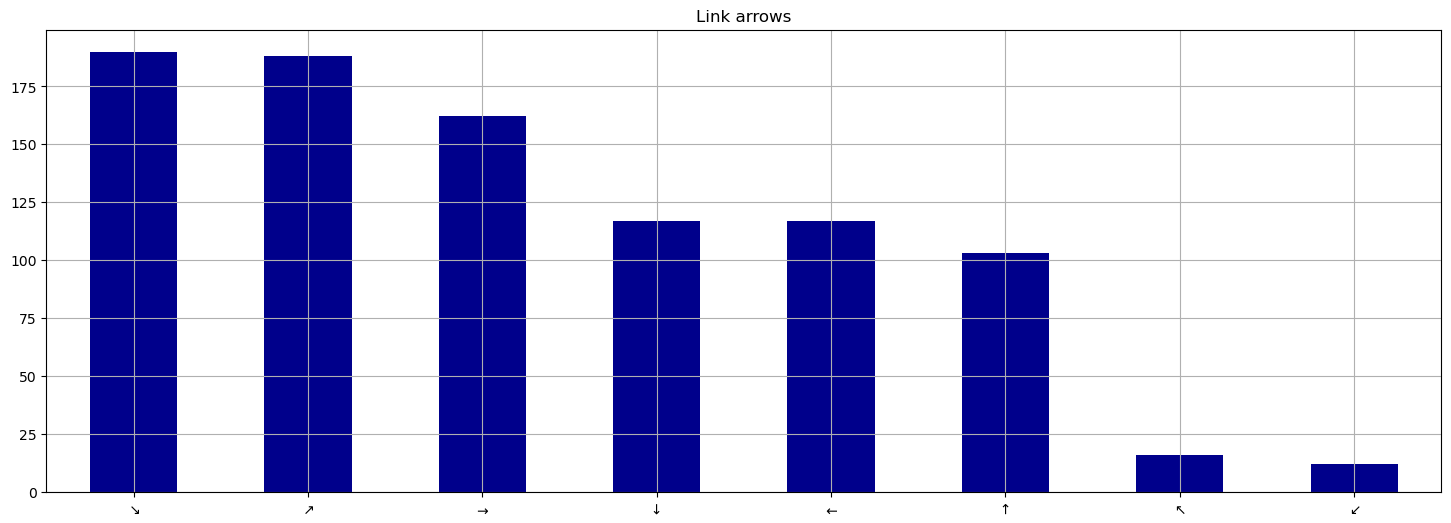

In [62]:
arrows_colors_b = colors_dict['Link Monster']
monster_df['Link Arrows'].explode('Link Arrows').value_counts().plot.bar(figsize = (18,6), grid = True, color = arrows_colors_b, title = 'Link arrows')
plt.show()

#### By link

In [63]:
arrow_per_link = monster_df[['Link Arrows','Link']].explode('Link Arrows').dropna()
arrow_crosstab = pd.crosstab(arrow_per_link['Link Arrows'],arrow_per_link['Link'])
arrow_crosstab

Link,1,2,3,4,5,6
Link Arrows,,,,,,
←,5,47,25,30,8,2
↑,10,29,44,28,4,2
→,2,33,26,31,9,2
↓,19,60,43,32,6,2
↖,1,3,5,2,0,1
↗,3,5,3,3,1,1
↘,3,96,54,25,9,1
↙,5,99,52,25,8,1


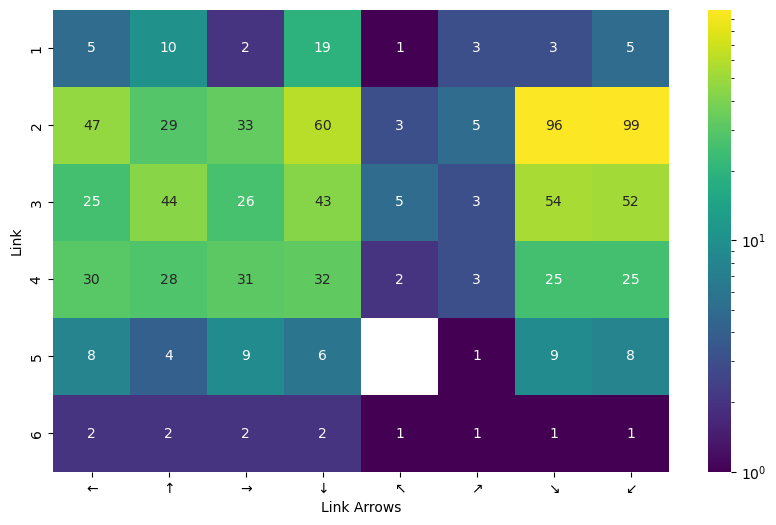

In [64]:
plt.figure(figsize = (10,6))
sns.heatmap(arrow_crosstab[arrow_crosstab>0].T, annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

## Spell & Trap

### Properties

In [65]:
print('Total number of properties:', st_df['Property'].nunique())

Total number of properties: 9


In [66]:
st_df.drop(columns=['Card type']).groupby('Property').nunique()

,Name,Password,Effect type,Archseries,TCG status,OCG status,Artwork,Modification date,Errata
Property,,,,,,,,,
Continuous Spell Card,422,421,55,162,5,4,2,418,3
Continuous Trap Card,494,486,64,162,3,2,1,493,3
Counter Trap Card,157,155,19,59,2,2,1,157,2
Equip Spell Card,264,264,37,74,3,2,1,264,3
Field Spell Card,276,273,35,143,5,4,1,277,3
Normal Spell Card,921,920,43,231,5,5,3,920,3
Normal Trap Card,1172,1170,48,240,6,4,2,1169,2
Quick-Play Spell Card,434,430,35,140,3,3,1,431,3
Ritual Spell Card,75,75,8,25,2,1,1,75,2


In [66]:
st_colors = [colors_dict[i] for i in full_df[['Card type','Property']].value_counts().index.get_level_values(0)]
st_df['Property'].value_counts().plot.bar(figsize = (18,6), grid = True, rot=45, color = st_colors, title = 'Property')
plt.show()


KeyboardInterrupt



### Effect type

In [ ]:
print('Total number of effect types:', st_df['Effect type'].explode().nunique())

In [ ]:
st_df.explode('Effect type').groupby('Effect type').nunique()

#### Spell & Trap discrimination

In [ ]:
spell = spell_df['Effect type'].explode('Effect type').value_counts().rename('Spell Card')
trap = trap_df['Effect type'].explode('Effect type').value_counts().rename('Trap Card')
st_diff = pd.concat([spell, trap], axis = 1).fillna(0).astype(int)
st_diff

In [ ]:
st_diff_colors = {'Spell Card': colors_dict['Spell Card'], 'Trap Card': colors_dict['Trap Card']}
st_diff.plot.bar(figsize = (18,6), stacked = True, grid = True, rot=45, color = st_diff_colors, title = 'Effect type')
plt.show()

## Archseries

In [ ]:
exploded_archseries = full_df.explode('Archseries')
print('Total number of Archseries:', exploded_archseries['Archseries'].nunique())

In [ ]:
exploded_archseries.groupby('Archseries').nunique()

In [ ]:
exploded_archseries['Archseries'].value_counts().plot.barh(figsize = (10,200), grid = True, title = 'Archtypes/Series')
plt.show()

### By card type

In [ ]:
archseries_crosstab = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Card type'], margins = True)
archseries_crosstab

### By primary type

In [ ]:
archseries_crosstab_b = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Primary type'], margins = True)
archseries_crosstab_b



### By secondary type

In [ ]:
archseries_crosstab_c = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Secondary type'], margins = True)
archseries_crosstab_c

### By monster type

In [ ]:
archseries_crosstab_d = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Monster type'], margins = True)
archseries_crosstab_d

### By property

In [ ]:
archseries_crosstab_e = pd.crosstab(exploded_archseries['Archseries'],exploded_archseries['Property'], margins = True)
archseries_crosstab_e

## Artworks

In [ ]:
print('Total number of cards with edited or alternate artworks:', full_df['Artwork'].count())

In [ ]:
full_df[['Name','Password','TCG status','OCG status','Artwork']][full_df['Artwork'].notna()]

In [ ]:
artwork_value_counts = full_df['Artwork'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Artworks')
venn2(subsets = (artwork_value_counts[('Alternate',)], artwork_value_counts[('Edited',)],artwork_value_counts[('Alternate','Edited')]), set_labels = ('Alternate artwork', 'Edited artwork'))
plt.show()

### By card type

In [ ]:
artwork_crosstab = pd.crosstab(full_df['Artwork'], full_df['Card type'])
artwork_crosstab

### By primary type

In [ ]:
artwork_crosstab_b = pd.crosstab(full_df['Artwork'], full_df['Primary type'])
artwork_crosstab_b

More granularity is unnecessary

## Errata

In [ ]:
print('Total number of cards with name or type errata:', full_df['Errata'].count())

In [ ]:
full_df[['Name','Password','TCG status','OCG status','Errata']][full_df['Errata'].notna()]

In [ ]:
errata_value_counts = full_df['Errata'].value_counts()
plt.figure(figsize=(20,8))
plt.title('Errata')
venn2(subsets = (errata_value_counts[('Name',)], errata_value_counts[('Type',)],errata_value_counts[('Name','Type')]), set_labels = ('Name Errata', 'Type errata'))
plt.show()

### By card type

In [ ]:
errata_crosstab = pd.crosstab(full_df['Errata'], full_df['Card type'])
errata_crosstab

### By primary type

In [ ]:
errata_crosstab_b = pd.crosstab(full_df['Errata'], full_df['Primary type'])
errata_crosstab_b

More granularity is unnecessary

### By artwork

In [ ]:
errata_crosstab_c = pd.crosstab(full_df['Artwork'], full_df['Errata'])
errata_crosstab_c

## TCG & OCG status

### TGC status

In [ ]:
print('Total number of TCG status:', full_df['TCG status'].nunique())

In [ ]:
full_df.groupby('TCG status', dropna=False).nunique()

In [ ]:
full_df['TCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [ ]:
# Remove unlimited
tcg_crosstab = pd.crosstab(full_df['Card type'], full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(tcg_crosstab[tcg_crosstab>0], annot=True, fmt="g", cmap='viridis', norm=mc.LogNorm())
plt.show()

#### By monster type

In [ ]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(full_df['Monster type'], full_df['TCG status']).drop(['Unlimited'], axis=1)
tcg_crosstab_b

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(tcg_crosstab_b[tcg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [ ]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['TCG status'], margins = True)
tcg_crosstab_c

### OCG status

In [ ]:
print('Total number of OCG status:', full_df['OCG status'].nunique())

In [ ]:
full_df.groupby('OCG status', dropna=False).nunique()

In [ ]:
full_df['OCG status'].value_counts(dropna = False).plot.bar(figsize = (18,6), logy=True, grid = True, rot=45, title = 'TCG status')
plt.show()

#### By card type

In [ ]:
# Remove unlimited
ocg_crosstab = pd.crosstab(full_df['Card type'], full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(ocg_crosstab[ocg_crosstab>0], annot=True, fmt="g", cmap='viridis')
plt.show()

#### By monster type

In [ ]:
ocg_crosstab_b = pd.crosstab(full_df['Monster type'], full_df['OCG status']).drop(['Unlimited'], axis=1)
ocg_crosstab_b

In [ ]:
plt.figure(figsize = (20,5))
sns.heatmap(ocg_crosstab_b[ocg_crosstab_b>0].T, annot=True, fmt="g", cmap='viridis', square = True)
plt.show()

#### By archseries

In [ ]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(exploded_archseries['Archseries'].where(exploded_archseries['OCG status']!='Unlimited'), exploded_archseries['OCG status'], margins = True)
ocg_crosstab_c

### TCG vs. OCG status

In [ ]:
cg_crosstab = pd.crosstab(full_df['OCG status'],full_df['TCG status'], dropna=False, margins = False)
cg_crosstab

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(cg_crosstab[cg_crosstab>0], annot=True, fmt="g", cmap='viridis', square=True, norm=mc.LogNorm())
plt.show()

# Extras

## Not yet released

In [ ]:
full_df.loc[full_df['OCG status'] == 'Not yet released'].loc[full_df['TCG status'] == 'Not yet released']

# Epilogue

In [ ]:
footer()

## HTML export

In [ ]:
# Save notebook on disck before generating HTML report
save_notebook()

In [ ]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

## Git

In [ ]:
! git add "../*[Cc]ards*"

In [ ]:
! git commit -m {"'Cards update-" + timestamp.strftime("%d%m%Y")+"'"}